False
False
True
True
False
False
False
True
True
False
False
True
True
True
False
True
True
True
False
False
True
False
False
True
True
False
False
True
False
True
X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


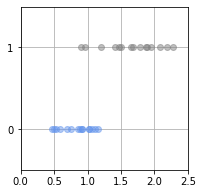

In [7]:
# サンプル
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# データ分布表示関数
def show_data(x,t):
    K = npy.max(t) + 1
    for k in range(K):
        plt.plot(x[t == k], t[t == k], X_col[k],alpha=0.5, linestyle='none',marker='o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0,1])

# データ生成
npy.random.seed(seed=0)
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue','gray']
X = npy.zeros(X_n)
# 目標データ
T = npy.zeros(X_n, dtype=npy.uint8)
# 分布の開始地点
Dist_s = [0.4,0.8]
# 分布の幅
Dist_w = [0.8,1.6]
# クラス0の比率
Pi = 0.5

for n in range(X_n):
    wk = npy.random.rand()
    print(wk<Pi)
    T[n] = 0*(wk<Pi) + 1 * (wk >= Pi)
    X[n] = npy.random.rand() * Dist_w[T[n]]+Dist_s[T[n]]
    
print('X=' + str(npy.round(X,2)))
print('T=' + str(T))

flg = plt.figure(figsize=(3,3))
show_data(X,T)
plt.show()

In [54]:
# データセット準備
import numpy as npy

# データ生成
views =[95,130,201,165,185,179,153,121,119,223,152,239,198,205,116,100,206,238,242,266,183,122,124,201,203,248,223,207,123]
# 1=休日、0=平日
day_of_week=[1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1]
#day_of_week=[0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0]

# データをblog_data.npzファイルに保存する
npy.savez('classdata1.npz',X=views,Y=day_of_week,X_min=min(views),X_max=max(views),X_n=len(views))

# データをblog_data.npzファイルから取り出す
sample_data = npy.load('classdata1.npz')

print(sample_data['X'])
print(sample_data['X_min'])

[ 95 130 201 165 185 179 153 121 119 223 152 239 198 205 116 100 206 238
 242 266 183 122 124 201 203 248 223 207 123]
95


X=[ 95 130 201 165 185 179 153 121 119 223 152 239 198 205 116 100 206 238
 242 266 183 122 124 201 203 248 223 207 123]
T=[1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1]


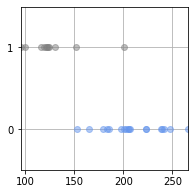

In [55]:
# データサンプルの分類
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# データ分布表示関数
def show_data(x,t):
    K = npy.max(t) + 1
    for k in range(K):
        # データ分布の設定
        plt.plot(x[t == k], t[t == k], X_col[k],alpha=0.5, linestyle='none',marker='o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0,1])

# データ生成
# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_min = sample_data['X_min']
X_max = sample_data['X_max']
X_n = sample_data['X_n']
X = sample_data['X']
X_col = ['cornflowerblue','gray']

# 目標データ
T = sample_data['Y']
    
print('X=' + str(npy.round(X,2)))
print('T=' + str(T))

flg = plt.figure(figsize=(3,3))
show_data(X,T)
plt.show()

153.0
201.0
[0, 0, 0, 0, 0, 0, 0, 1]
0.125


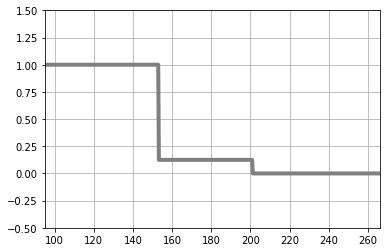

In [32]:
# 確率での表現
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

def func(xline,b_B,b_C,class_B_value):
    yline=[]
    for i in xline: 
        if i < b_B:
            yline.append(1)
        elif i <= b_C:
            yline.append(class_B_value)
        else:
            yline.append(0)
    return yline

# データ生成
# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_min = sample_data['X_min']
X_max = sample_data['X_max']
X_n = sample_data['X_n']
X = sample_data['X']
X_col = ['cornflowerblue','gray']
# 目標データ
T = sample_data['Y']
# 平日リスト
w_days = npy.zeros(npy.count_nonzero(T == 0))
w_num = 0
# 休日リスト
h_days = npy.zeros(npy.count_nonzero(T != 0))
h_num = 0
# 平日データと休日データの分割
for i in range(X_n):
    if T[i] == 0:
        w_days[w_num] = X[i]
        w_num = w_num + 1
    else:
        h_days[h_num] = X[i]
        h_num = h_num + 1

# クラス範囲の設定
border_B = min(w_days)
border_C = max(h_days)

class_A = []
class_B = []
class_C = []
class_B_count = []
print(border_B)
print(border_C)

for num in w_days:
    # 平日はクラスBかCに割り振る
    if num <= border_C:
        class_B.append(num)
        class_B_count.append(0)
    else:
        class_C.append(num)

for num in h_days:
    # 休日はクラスAかBに割り振る
    if num < border_B:
        class_A.append(num)
    else:
        class_B.append(num)
        class_B_count.append(1)

xline = npy.linspace(X_min, X_max, 500)
b_value = npy.mean(class_B_count)
yline = func(xline, border_B, border_C, b_value)
print(class_B_count)
print(npy.round(b_value,3))
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(-.5, 1.5)
plt.plot(xline,yline,color='gray',linewidth=4)


0.125
0.049


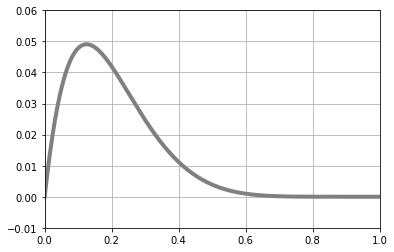

In [50]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

def function(w):
    return (1-w)**7*w

W = npy.linspace(0, 1, 400)
Y = function(W)

plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-.01, 0.06)
plt.plot(W,Y,color='gray',linewidth=4)

max_w = W[npy.argmax(Y)]
max_y = max(Y)
print(npy.round(max_w,3))
print(npy.round(max_y,3))